## Hypothesis Testing

![](https://i0.wp.com/www.de.sarupub.org/wp-content/uploads/Hypothesis-meaning-for-Qantitative-and-Qualitative-data.jpg)

The “hypothesis” refers to the researcher’s initial belief about the situation before the study

A **Hypothesis test** is a statistical test that is used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population.

A hypothesis test examines two opposing hypotheses about a population: the null hypothesis and the alternative hypothesis.


> Null hypothesis (H0):

The null hypothesis states that a population parameter is equal to a value. The null hypothesis is often an initial claim that researchers specify using previous research or knowledge.

> Alternative Hypothesis (H1):

The alternative hypothesis states that the population parameter is different than the value of the population parameter in the null hypothesis. The alternative hypothesis is what you might believe to be true or hope to prove true.

Based on the sample data, the test determines whether to reject the null hypothesis.

__Hypothesis Testing of Quantitative Data__

Example

H0: I believe that the mean Milli litre of Juices consumed yearly is 200 Ml

Hypothesis for Quantitative Data has numbers as the base to verify or test with. In the above example we have to test whether the mean juice consumed per year is 200 ml from the data collected or the calculated mean or assumed mean. The data is scale data.

__Hypothesis Testing of Qualitative Data__

H0: There is no association between gender and the type of juice consumed

Hypothesis for Qualitative Data does not have numbers. The data is nominal or ordinal. The result of the hypothesis is Accepting the null hypothesis (Ho) or Rejecting the null hypothesis (H0).



![Example 1](https://zalarieunique.ru/images/data-clipart-hypothesis-testing-2.gif)


Another Example :

__Hypothesis Test__ :

You like a girl very much. However you are not very sure if she likes you too. Still you took chance and decided to propose her.Now in this scenario , you know there is going to  be only two results . Yes or NO. Now , here your girl is an hard core statician. She would anser you in statistical terms.

**Assumption (H0)** : You assumed that her reply will be NO.

**Chances (H1)** : She might say yes.
    
You : Hey Miss , I love and i want to marry you.
    
Girl : Okay , i reject the null Hypothesis.
    
__Result__ : Yes , she has said yes to your proposal. Because the null hypotheis was rejected. However she rejected the rejection result and hence rejecting the rejection hypotheis means she has accepted the alternate hopthesis.

Based on the sample data, the test determines whether to reject the null hypothesis. You use a **p-value**, to make the determination. If the p-value is less than or equal to the level of significance, which is a cut-off point that you define, and then you can reject the null hypothesis.

You can follow four basic steps to correctly set up and perform a hypothesis test. 

1. Formulate Hypothesis ,( Null : Ho and Alternate : H1)
2. Identify the level of significance
3. Select the appropriate statistical tests
4. Calculate test statistics
5. Make decision (reject or fail to reject the null hypothesis)

### Various kind of hypothesis Test exists :
    
1. **Normal Distribution** (Z-test )<br>
2. **Student t Distribution**(T-Test ) <br>
3. **ANOVA**(F-test )<br>


**The p-value is a probability**. 

A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.  When the p-value is very small, it means it is very unlikely (small probability) that the observed spatial pattern is the result of random processes, so you can reject the null hypothesis.

## Z-test 

**Z-score **

**Z-scores are standard deviations**. If, for example, a tool returns a z-score of +2.5, you would say that the result is 2.5 standard deviations. In statistics, instead of saying our data is two standard deviations from the mean, we assess it in terms of a z-score, which just represents the number of standard deviations a point is from the mean. 

Both z-scores and p-values are associated with the standard normal distribution as shown below.

![](http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png)

Consequently, before you run the test statistic, you select a confidence level. Typical confidence levels are 90, 95, or 99 percent. 

A confidence level of 99 percent would be the most conservative in this case, indicating that you are unwilling to reject the null hypothesis unless the probability that the pattern was created by random chance is really small (less than a 1 percent probability).



![](assets/ztop.png)

In [49]:
## Convert z-score to z-normal-distribution

## Note : percentage point function (ppf) is the inverse of the cdf
import scipy.stats as st
import scipy

def z_to_p_distribution(z=1.6445) : 
     return 1 - st.norm.cdf(z)

# def p_distribution_to_z(percent=0.95):
#     return st.norm.ppf(percent)

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats

In [33]:
payroll = pd.read_csv("../datasets/pay_roll_dataset.csv")

In [34]:
payroll.describe()

,Row ID,Year,Payroll Department,FMS Department,Job Class
count,285008.000000,285008.000000,231463.000000,285008.000000,285008.000000
mean,142544.329759,2014.786701,4557.472067,66.271340,3051.039967
std,82330.135857,1.161369,2508.764234,29.304236,2038.694130
min,1.000000,2013.000000,101.000000,2.000000,1.000000
25%,71252.750000,2014.000000,3001.000000,42.000000,1960.000000
50%,142504.500000,2015.000000,4301.000000,70.000000,2234.000000
75%,213756.250000,2016.000000,7031.000000,88.000000,3580.000000
max,285208.000000,2016.000000,8702.000000,98.000000,9998.000000


**Data Cleansing**

In [35]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [36]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

**Outlier removal**

In [37]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

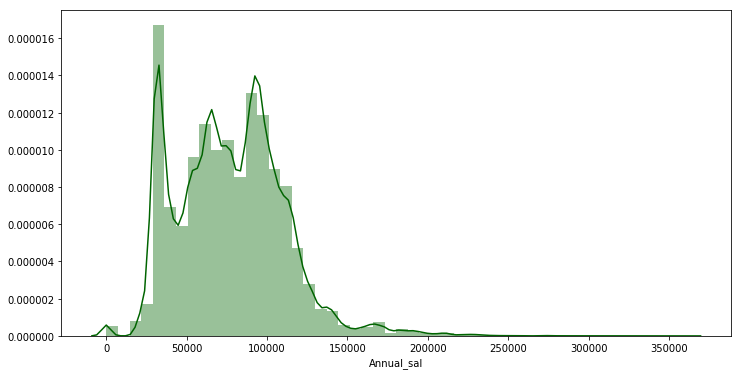

In [38]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Annual_sal,color = 'darkgreen')

**Creating different Sample  from the population**

In [39]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]

**Calculating the Population Parameters**

In [40]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152504776
Population Standard Deviation: 34232.25489729045


**Calculating the Sample Parameters**

In [41]:
# print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Sample Mean: 78792.96653850452
Sample Standard Deviation: 33241.527269478385


In [42]:
N = len(payroll_2016_sample)

**Hypothesis Testing**

<b>Normal distribution - Z test</b><br><br>
<b>Null Hypothesis</b> : Pay does not increase in 2016<br>
<b>Alternate Hypothesis</b>: It increases<br>
<b>Population parameters</b>: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
<b>Sample parameters</b> :   Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [53]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
critical_level_of_significance = z_to_p_distribution(1.65)
# Calculate the test statistics 

![](https://i.stack.imgur.com/0Ojpu.png)

In [55]:
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(N))/pop_std_2015
test_p_value = z_to_p_distribution(zscore_test_stat)

In [56]:
if test_p_value < critical_level_of_significance:
    print("Null hypothesis rejected ..")
else:
    print("Failed to reject null hypothesis rejected ..")

Null hypothesis rejected ..


<b>Conclusion</b>: As the test statistics fall into the rejection region the null hypothesis is rejected<br>
and it can be concluded that the Annual salaries increase in 2016.

**Student T-distribution**<br>
**Null Hypothesis**: pay does not increase in 2016<br>
**Alternate Hypothesis**: it increases<br>
**Population parameters**: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
**Sample parameters** : Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [21]:
#Calculating the Sample Parameters**
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2015 = payroll[payroll.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [22]:
# payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [23]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculate the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

print(tscore_test_stat)

0.38653857613892795


Depending on the Test score , we can accept/Reject the Null

## T-score vs. z-score: When to use a t score

The general rule of thumb for when to use a t score is when your sample:

* Has a sample size below 30,
* Has an unknown population standard deviation.

> You must know the standard deviation of the population and your sample size should be above 30 in order for you to be able to use the z-score. 

Like z-scores, t-scores are also a conversion of individual scores into a standard form. However, t-scores are used when you don’t know the population standard deviation; You make an estimate by using your sample.
$$T = (X – μ) / [ s/√(n) ]$$

Where:
s is the standard deviation of the sample.

If you have a larger sample (over 30), the t-distribution and z-distribution look pretty much the same. Therefore, you can use either. That said, if you know σ, it doesn’t make much sense to use a sample estimate instead of the “real thing”, so just substitute σ into the equation in place of s:

$$T = (X – μ) / [ σ/√(n) ].$$

This makes the equation identical to the one for the z-score; the only difference is you’re looking up the result in the T table, not the Z-table. 

For sample sizes over 30, you’ll get the same result.

> for z-table lookup :

**p = 1 - stats.norm.cdf(z)**

> for t-table lookup : 

**p = 1 - stats.t.cdf(t,df=df)**

## F Test **

This is a generalisation of t-test for more than two samples.

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

The means from three different samples are compared using ANOVA.

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. Specifically, it tests the null hypothesis:

$$H0  = \mu1 = \mu2 = \mu3 = ... = \mu j $$

In [24]:
payroll_2014 = payroll[payroll.Year ==2014]

payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']

In [25]:
sample_elec_2014 = payroll_2014_elec.sample(frac=0.47)
sample_elec_mean_2014 = sample_elec_2014['Base_Pay'].mean()
print("Sample Mean 2014 "+str(sample_elec_mean_2014))

Sample Mean 2014 71658.01057142856


In [26]:
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))

Sample Mean 2015 71171.71771428571


In [27]:
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample Mean 2016 "+str(sample_elec_mean_2016))

Sample Mean 2016 33657.04200000001


In [28]:
# Creating the Samples of the base pays over three years
sam_1 = sample_elec_2014.Base_Pay
sam_2 = sample_elec_2015.Base_Pay
sam_3 = sample_elec_2016.Base_Pay

**Calculating the test statistics**

In [29]:
f, p = stats.f_oneway(sam_1, sam_2, sam_3 )
print ('F value:', f)
print ('P value:', p, '\n')

F value: 45.471367430040885
P value: 7.616559226913299e-15 



P value is very low, hence null hypothesis is rejected

## Type 1 and Type 2 Error :
    
**In statistical hypothesis testing, a type I error is the rejection of a true null hypothesis (also known as a "false positive" finding), while a type II error is failing to reject a false null hypothesis (also known as a "false negative" finding).***
    
![](http://1.bp.blogspot.com/-Mul2LyO5p00/UF1WPQckhmI/AAAAAAAAAWY/Tqqz1tAupDM/s1600/Picture3-1024x896.png)    
        
